In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")

df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


np.int64(0)

No critical missing values were found. Duplicate rows were removed to prevent data leakage.

In [4]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['ip_address'] = df['ip_address'].astype(int)


In [5]:
class_counts = df['class'].value_counts()
class_ratio = df['class'].value_counts(normalize=True)

class_counts, class_ratio


(class
 0    136961
 1     14151
 Name: count, dtype: int64,
 class
 0    0.906354
 1    0.093646
 Name: proportion, dtype: float64)

The dataset is highly imbalanced, with fraudulent transactions representing less than 2% of all transactions. Therefore, accuracy alone is not an appropriate evaluation metric.

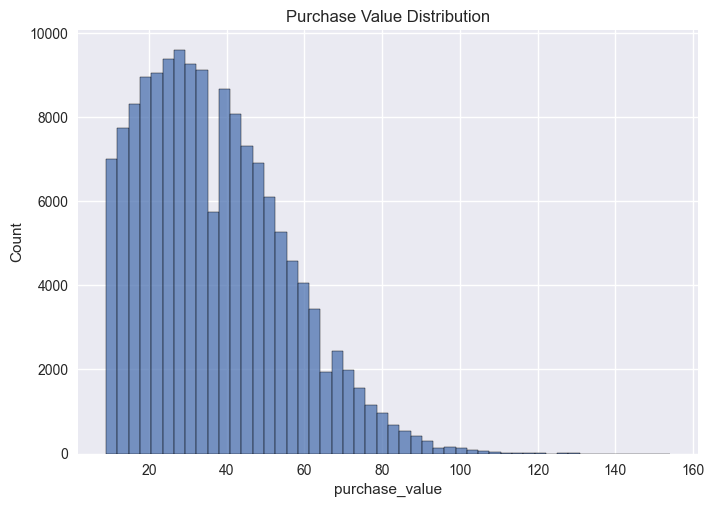

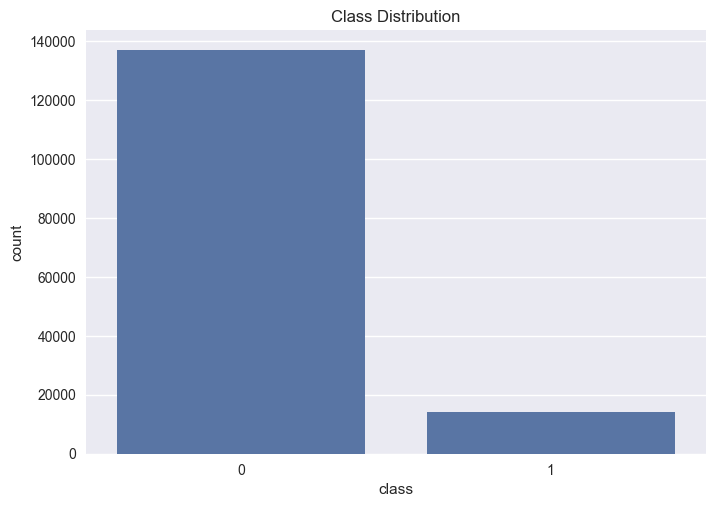

In [6]:
sns.histplot(df['purchase_value'], bins=50)
plt.title("Purchase Value Distribution")
plt.show()

sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()


In [7]:
df['hour_of_day'] = df['purchase_time'].dt.hour
df['day_of_week'] = df['purchase_time'].dt.dayofweek
df['time_since_signup'] = (
    df['purchase_time'] - df['signup_time']
).dt.total_seconds()


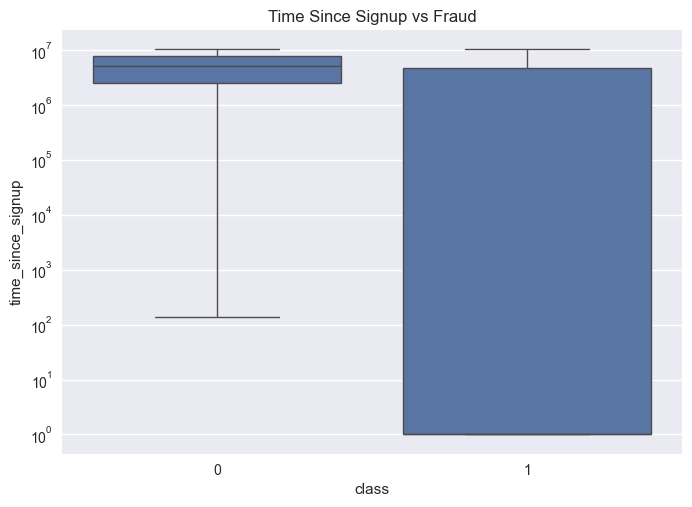

In [8]:
sns.boxplot(x='class', y='time_since_signup', data=df)
plt.yscale("log")
plt.title("Time Since Signup vs Fraud")
plt.show()


In [9]:
df.to_csv("../data/processed/fraud_data_cleaned.csv", index=False)
